In [4]:
import numpy as np
import matplotlib.pyplot as plt
import rawpy 
import os
from pathlib import Path
from scipy.ndimage import binary_opening

/home/laura/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Read raw images file
Using [rawpy](https://letmaik.github.io/rawpy/api/rawpy.RawPy.html) library to read the pixel values.

The camera should be 4000 * 6000 pixels but the raw image only has 3464*5202

In [ ]:
# use rawpy library to read the pixel intensity values of the raw image

pardir = Path.cwd().parent
file = os.path.join(pardir, "experiment-images/camera-1/IMG_1790.CR2")

def process_raw(file_path):
    raw = rawpy.imread(file) 
    black_level = raw.black_level_per_channel # black level offset 
    raw_image = raw.raw_image_visible.astype(np.float32) # raw pixel intensity value
    raw_image = raw_image - black_level[0] # apply black level correction
    raw_image = np.clip(raw_image, 0, None) # avoid negavative values
    return raw_image


In [65]:
# crop picture by taking bounds of non-black pixels, set a threshold for non-black on the normalized pixel values
# use binary_opening to remove bright spots in the background
def crop_image(raw_image, threshold= 0.1):
    raw_image_norm = raw_image / np.max(raw_image)
    mask = raw_image_norm > 0.005
    cleaned_mask = binary_opening(mask, structure=np.ones((5, 5)))
    non_black_pixels = np.argwhere(cleaned_mask > threshold)
    y_min, x_min = np.min(non_black_pixels, axis = 0)
    y_max, x_max = np.max(non_black_pixels, axis = 0)
    cropped_image = raw_image[y_min:y_max+1, x_min:x_max+1]
    return cropped_image

In [ ]:
# Plot image in black and white
def display_image(raw_image):
    raw_image_norm = raw_image / np.max(raw_image)
    plt.imshow(raw_image_norm, cmap='gray')
    plt.axis("off")
    plt.tight_layout()
    plt.show()

# Visualize the brightest spot of the image
def display_brightest_spot(raw_image):
    


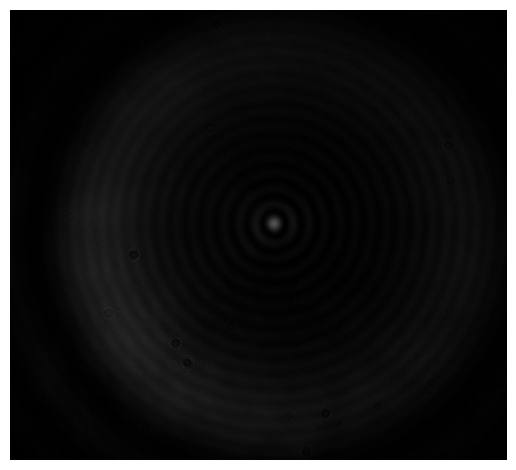

In [67]:
cropped_image = crop_image(raw_image, 0.01)
display_image(cropped_image)